<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part3/ch06_confidence.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.2 Confidence Intervals

A **confidence interval** provides a range of plausible values for a population parameter. It quantifies the uncertainty in our estimate.

## The Big Idea

Instead of saying "the population mean is exactly $(\bar{x})$", we say:

> "We are 95% confident that the population mean lies between a and b"

This accounts for the fact that $(\bar{x})$ is based on a sample and has variability.

## Constructing Confidence Intervals

### The General Form

A **confidence interval** for a parameter θ has the form:

$$
\text{estimate} \pm \text{margin of error}
$$

More precisely:

$$
\bar{x} \pm z_{\alpha/2} \cdot \text{SE}(\bar{x})
$$

where:
- $(\bar{x})$ is the sample mean (our estimate)
- $(z_{\alpha/2})$ is a critical value from the standard normal distribution
- $(\text{SE}(\bar{x}))$ is the standard error

### Common Confidence Levels

| Confidence Level | α | zₐ/₂ |
|------------------|-----|-------|
| 90% | 0.10 | 1.645 |
| 95% | 0.05 | 1.960 |
| 99% | 0.01 | 2.576 |

### Interpretation

**Correct**: "If we repeated this sampling process many times and constructed a 95% CI each time, about 95% of those intervals would contain the true population mean μ."

**Incorrect**: "There is a 95% probability that μ is in this specific interval."

(Once the interval is computed, μ either is or isn't in it - there's no probability involved!)

## Estimating the Standard Error

### The Problem

The formula $(\text{SE}(\bar{X}) = \frac{\sigma}{\sqrt{n}})$ requires knowing σ, the population standard deviation. But usually we don't know σ!

### The Solution: Sample Standard Deviation

We estimate σ using the **sample standard deviation**:

$$
s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

Note the $(n-1)$ in the denominator (Bessel's correction) - this makes s an unbiased estimator of σ.

### The t-Distribution

When we replace σ with s, the distribution changes from normal to **t-distribution**:

$$
\frac{\bar{X} - \mu}{s/\sqrt{n}} \sim t_{n-1}
$$

where $(t_{n-1})$ is the t-distribution with $(n-1)$ degrees of freedom.

**Properties of the t-distribution**:
- Symmetric and bell-shaped (like normal)
- Heavier tails than normal (accounts for uncertainty in s)
- As $(n \to \infty)$, $(t_{n-1} \to N(0,1))$

## Confidence Interval for Population Mean

### Case 1: Known Population Variance (σ² known)

A $((1-\alpha) \times 100\%)$ confidence interval for μ is:

$$
\bar{x} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

### Case 2: Unknown Population Variance (σ² unknown) - Most Common!

A $((1-\alpha) \times 100\%)$ confidence interval for μ is:

$$
\bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{s}{\sqrt{n}}
$$

where $(t_{\alpha/2, n-1})$ is the critical value from the t-distribution with $(n-1)$ degrees of freedom.

## Python Example: Computing Confidence Intervals

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def confidence_interval(data, confidence=0.95):
    """
    Compute confidence interval for population mean.
    
    Parameters:
    -----------
    data : array-like
        Sample data
    confidence : float
        Confidence level (default 0.95 for 95% CI)
    
    Returns:
    --------
    tuple : (lower_bound, upper_bound, margin_of_error)
    """
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)  # Standard error of the mean
    
    # Degrees of freedom
    df = n - 1
    
    # t critical value
    alpha = 1 - confidence
    t_crit = stats.t.ppf(1 - alpha/2, df)
    
    # Margin of error
    margin = t_crit * se
    
    # Confidence interval
    ci_lower = mean - margin
    ci_upper = mean + margin
    
    return ci_lower, ci_upper, margin

# Example: Student test scores
np.random.seed(42)
scores = np.random.normal(75, 10, 30)  # 30 students, true mean=75, true std=10

# Compute 95% CI
lower, upper, margin = confidence_interval(scores, confidence=0.95)

print(f"Sample mean: {np.mean(scores):.2f}")
print(f"Sample std: {np.std(scores, ddof=1):.2f}")
print(f"Sample size: {len(scores)}")
print(f"\n95% Confidence Interval: [{lower:.2f}, {upper:.2f}]")
print(f"Margin of error: {margin:.2f}")
print(f"\nInterpretation: We are 95% confident that the true mean score")
print(f"is between {lower:.2f} and {upper:.2f}.")

# Compare with different confidence levels
print("\n" + "="*60)
print("Comparison of Different Confidence Levels")
print("="*60)
for conf in [0.90, 0.95, 0.99]:
    lower, upper, margin = confidence_interval(scores, confidence=conf)
    width = upper - lower
    print(f"{int(conf*100)}% CI: [{lower:6.2f}, {upper:6.2f}]  Width: {width:5.2f}  Margin: {margin:5.2f}")

Sample mean: 73.12
Sample std: 9.00
Sample size: 30

95% Confidence Interval: [69.76, 76.48]
Margin of error: 3.36

Interpretation: We are 95% confident that the true mean score
is between 69.76 and 76.48.

Comparison of Different Confidence Levels
90% CI: [ 70.33,  75.91]  Width:  5.58  Margin:  2.79
95% CI: [ 69.76,  76.48]  Width:  6.72  Margin:  3.36
99% CI: [ 68.59,  77.65]  Width:  9.06  Margin:  4.53


**Observation**: Higher confidence requires wider intervals!

## Visualizing Confidence Intervals

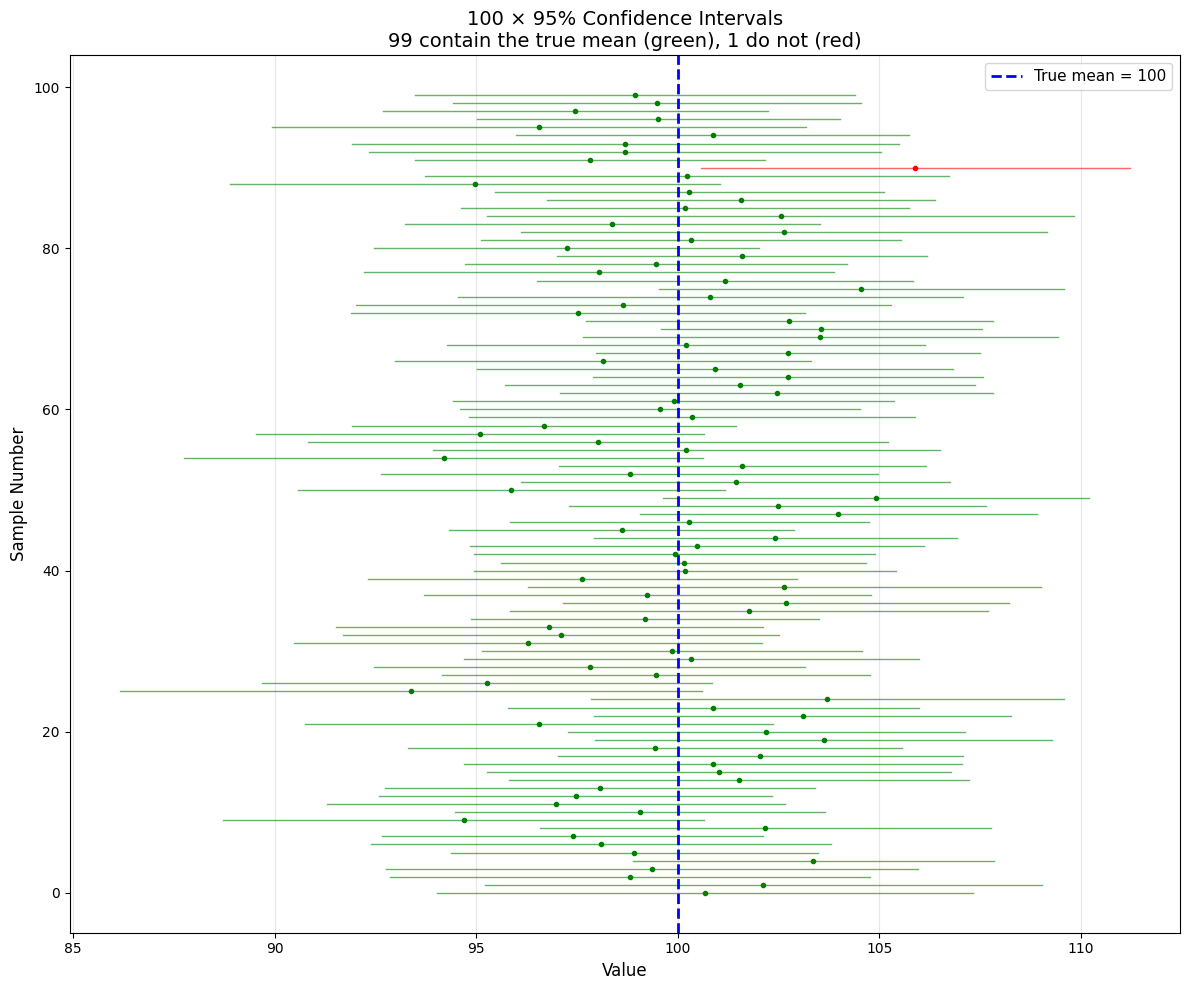


Out of 100 confidence intervals:
  99 (99.0%) contain the true mean
  1 (1.0%) do not

Expected: ~95% should contain the true mean


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# True population
true_mean = 100
true_std = 15

# Function to generate CI from one sample
def generate_ci(sample_size=30, confidence=0.95):
    sample = np.random.normal(true_mean, true_std, sample_size)
    mean = np.mean(sample)
    se = stats.sem(sample)
    df = sample_size - 1
    alpha = 1 - confidence
    t_crit = stats.t.ppf(1 - alpha/2, df)
    margin = t_crit * se
    return mean, mean - margin, mean + margin

# Generate many CIs
np.random.seed(123)
n_intervals = 100
intervals = [generate_ci() for _ in range(n_intervals)]

# Check which intervals contain the true mean
contains_true = [lower <= true_mean <= upper for _, lower, upper in intervals]
n_contain = sum(contains_true)

# Plot
fig, ax = plt.subplots(figsize=(12, 10))

for i, (mean, lower, upper) in enumerate(intervals):
    color = 'green' if contains_true[i] else 'red'
    ax.plot([lower, upper], [i, i], color=color, linewidth=1, alpha=0.6)
    ax.plot(mean, i, 'o', color=color, markersize=3)

ax.axvline(true_mean, color='blue', linestyle='--', linewidth=2, 
           label=f'True mean = {true_mean}')
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Sample Number', fontsize=12)
ax.set_title(f'100 × 95% Confidence Intervals\n{n_contain} contain the true mean (green), {n_intervals-n_contain} do not (red)',
             fontsize=14)
ax.legend(fontsize=11)
ax.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('confidence_intervals_simulation.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nOut of {n_intervals} confidence intervals:")
print(f"  {n_contain} ({n_contain/n_intervals*100:.1f}%) contain the true mean")
print(f"  {n_intervals-n_contain} ({(n_intervals-n_contain)/n_intervals*100:.1f}%) do not")
print(f"\nExpected: ~95% should contain the true mean")

## The Central Limit Theorem and CIs

### Why CIs Work

The Central Limit Theorem states that for large n:

$$
\bar{X} \sim N\left(\mu, \frac{\sigma^2}{n}\right)
$$

approximately, regardless of the population distribution!

### How Large is "Large Enough"?

- **Symmetric, unimodal populations**: n ≥ 15 is usually sufficient
- **Moderately skewed**: n ≥ 30
- **Heavily skewed or extreme outliers**: n ≥ 100 or more

### Python Example: CLT in Action

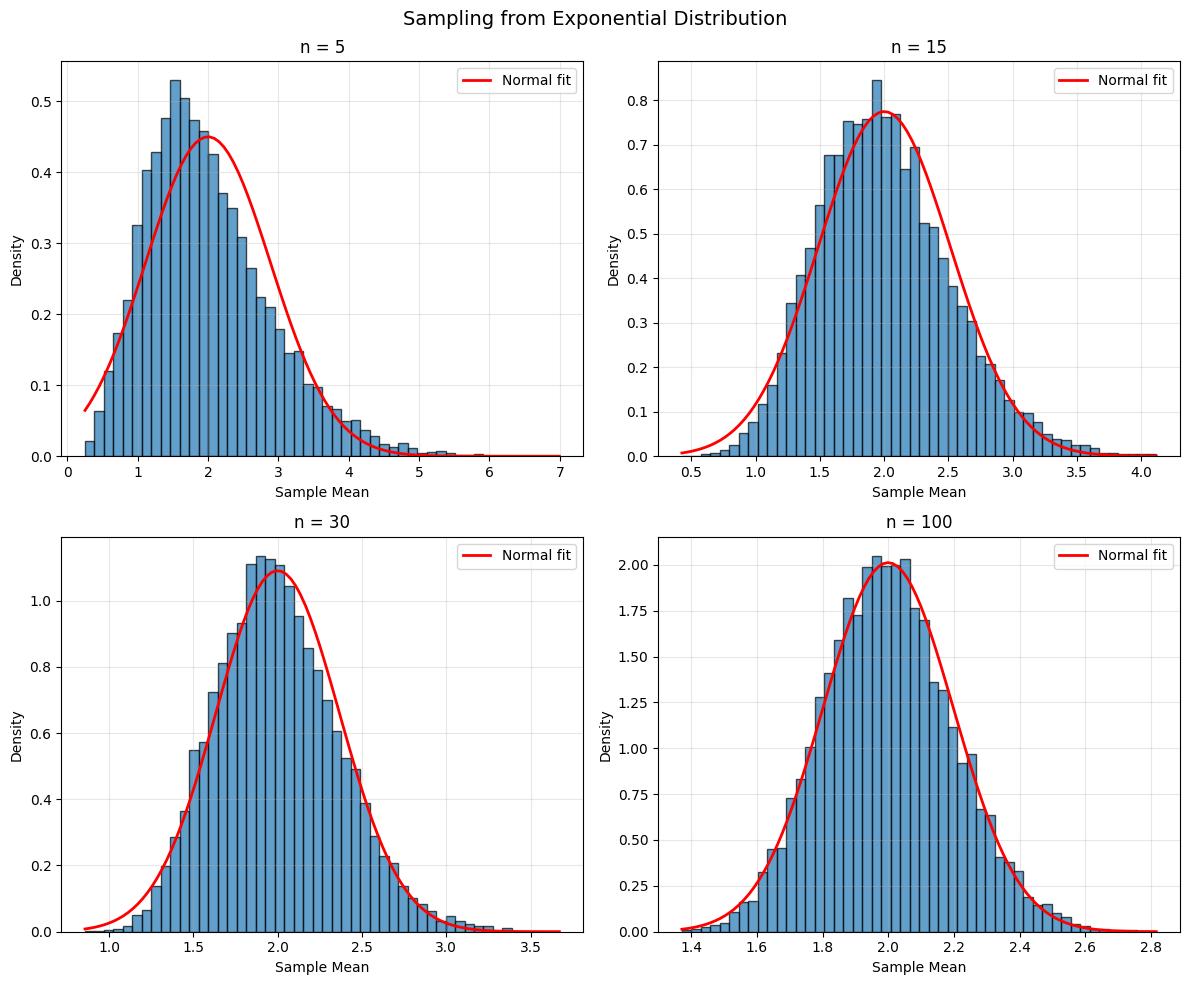

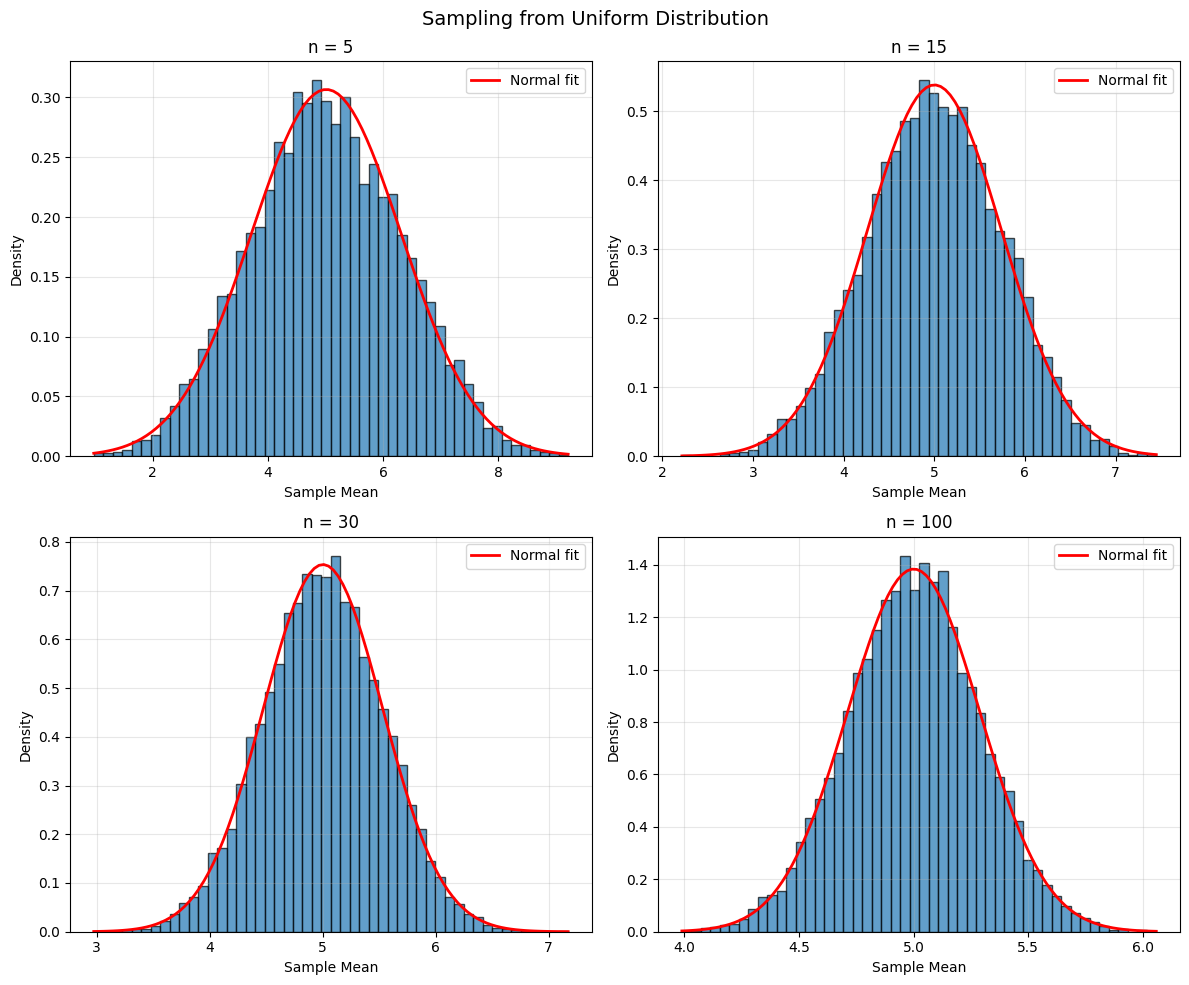

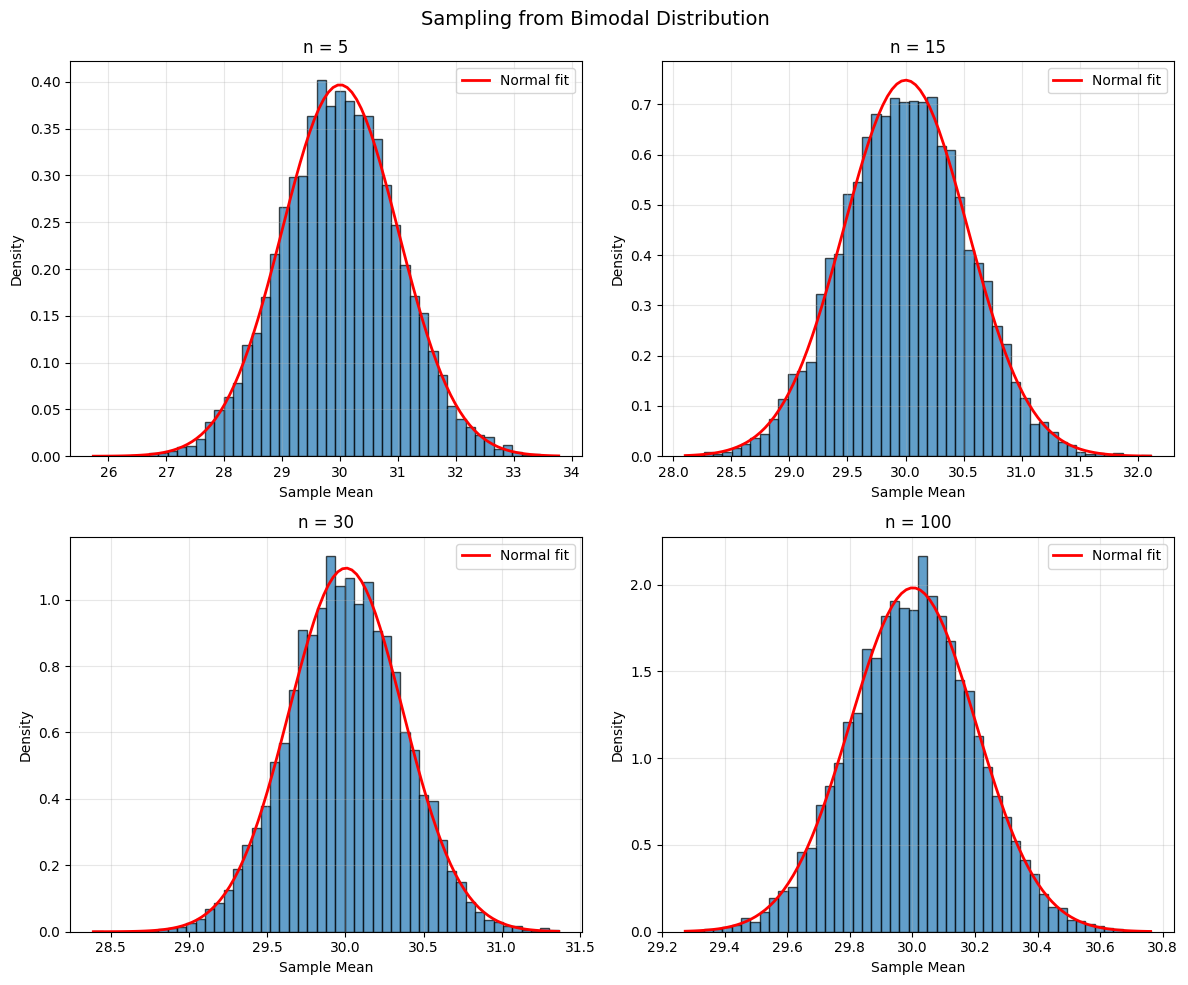

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Three very different populations
populations = {
    'Exponential': lambda n: np.random.exponential(2, n),
    'Uniform': lambda n: np.random.uniform(0, 10, n),
    'Bimodal': lambda n: np.concatenate([np.random.normal(20, 2, n//2), 
                                          np.random.normal(40, 2, n//2)])
}

sample_sizes = [5, 15, 30, 100]

for pop_name, pop_func in populations.items():
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Sampling from {pop_name} Distribution', fontsize=14)
    axes = axes.ravel()
    
    for idx, n in enumerate(sample_sizes):
        # Generate many sample means
        sample_means = [np.mean(pop_func(n)) for _ in range(10000)]
        
        # Plot
        axes[idx].hist(sample_means, bins=50, density=True, alpha=0.7, edgecolor='black')
        
        # Overlay normal approximation
        mean_of_means = np.mean(sample_means)
        std_of_means = np.std(sample_means)
        x = np.linspace(min(sample_means), max(sample_means), 100)
        axes[idx].plot(x, stats.norm.pdf(x, mean_of_means, std_of_means),
                      'r-', linewidth=2, label='Normal fit')
        
        axes[idx].set_title(f'n = {n}')
        axes[idx].set_xlabel('Sample Mean')
        axes[idx].set_ylabel('Density')
        axes[idx].legend()
        axes[idx].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'clt_{pop_name.lower()}.png', dpi=150, bbox_inches='tight')
    plt.show()

## Standard Error from Simulation (Bootstrap)

When the theoretical SE formula is complicated or unknown, we can estimate it via **simulation**:

### The Bootstrap Method

1. From the original sample of size n, draw many **resamples** (with replacement)
2. Compute the statistic of interest for each resample
3. The standard deviation of these statistics estimates the SE

In [4]:
import numpy as np
from scipy import stats

def bootstrap_ci(data, statistic=np.mean, n_bootstrap=10000, confidence=0.95):
    """
    Compute bootstrap confidence interval.
    
    Parameters:
    -----------
    data : array-like
        Original sample
    statistic : function
        Function to compute on each bootstrap sample (default: mean)
    n_bootstrap : int
        Number of bootstrap resamples
    confidence : float
        Confidence level
    
    Returns:
    --------
    tuple : (lower_bound, upper_bound, bootstrap_se)
    """
    n = len(data)
    bootstrap_stats = []
    
    for _ in range(n_bootstrap):
        # Resample with replacement
        resample = np.random.choice(data, size=n, replace=True)
        bootstrap_stats.append(statistic(resample))
    
    bootstrap_stats = np.array(bootstrap_stats)
    
    # Compute percentiles for CI
    alpha = 1 - confidence
    lower_percentile = (alpha/2) * 100
    upper_percentile = (1 - alpha/2) * 100
    
    ci_lower = np.percentile(bootstrap_stats, lower_percentile)
    ci_upper = np.percentile(bootstrap_stats, upper_percentile)
    
    # Bootstrap SE
    bootstrap_se = np.std(bootstrap_stats, ddof=1)
    
    return ci_lower, ci_upper, bootstrap_se

# Example
np.random.seed(42)
data = np.random.exponential(5, 50)  # Skewed data

print("Original sample:")
print(f"  Mean: {np.mean(data):.3f}")
print(f"  Median: {np.median(data):.3f}")
print(f"  n = {len(data)}")

# Bootstrap CI for mean
lower, upper, boot_se = bootstrap_ci(data, statistic=np.mean)
print(f"\nBootstrap 95% CI for mean: [{lower:.3f}, {upper:.3f}]")
print(f"Bootstrap SE: {boot_se:.3f}")

# Bootstrap CI for median
lower_med, upper_med, boot_se_med = bootstrap_ci(data, statistic=np.median)
print(f"\nBootstrap 95% CI for median: [{lower_med:.3f}, {upper_med:.3f}]")
print(f"Bootstrap SE: {boot_se_med:.3f}")

# Compare with traditional CI
traditional_lower, traditional_upper, _ = confidence_interval(data)
print(f"\nTraditional 95% CI for mean: [{traditional_lower:.3f}, {traditional_upper:.3f}]")
print(f"Traditional SE: {stats.sem(data):.3f}")

Original sample:
  Mean: 4.230
  Median: 2.864
  n = 50

Bootstrap 95% CI for mean: [3.057, 5.491]
Bootstrap SE: 0.621

Bootstrap 95% CI for median: [1.724, 4.133]
Bootstrap SE: 0.697

Traditional 95% CI for mean: [2.960, 5.500]
Traditional SE: 0.632


## Practical Considerations

### Width of Confidence Intervals

The width of a CI depends on:

1. **Confidence level**: Higher confidence → wider interval
2. **Sample size**: Larger n → narrower interval (by factor of \(\sqrt{n}\))
3. **Population variability**: Larger σ → wider interval

### Common Mistakes

❌ **Wrong**: "95% of the data falls in this interval"
✅ **Right**: "We're 95% confident the population mean is in this interval"

❌ **Wrong**: "The probability that μ is in [a,b] is 0.95"
✅ **Right**: "If we repeated this process, 95% of intervals would contain μ"

❌ **Wrong**: Using z-values when σ is unknown
✅ **Right**: Using t-values when σ is estimated by s

## Practice Problems

### Problem 1: Battery Life
A sample of 16 batteries has mean lifetime 120 hours with standard deviation 15 hours. Construct a 95% confidence interval for the population mean.

**Solution**:

In [6]:
n = 16
mean = 120
s = 15
confidence = 0.95

# t critical value (df = 15)
t_crit = stats.t.ppf(0.975, df=15)  # 2.131
se = s / np.sqrt(n)  # 15/4 = 3.75
margin = t_crit * se  # 2.131 * 3.75 = 7.99

ci_lower = mean - margin  # 112.01
ci_upper = mean + margin  # 127.99

print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

95% CI: [112.01, 127.99]



**Answer**: [112.01, 127.99] hours

### Problem 2: Sample Size for Desired Margin
You want a 95% CI for mean height with margin of error ± 2 cm. If σ = 10 cm, how large a sample do you need?

**Solution**:
$$
E = z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \implies 2 = 1.96 \cdot \frac{10}{\sqrt{n}}
$$
$$
\sqrt{n} = \frac{1.96 \times 10}{2} = 9.8 \implies n = 96.04 \approx 97
$$

**Answer**: Need n = 97 people

### Problem 3: Interpreting Width
Two 95% CIs are constructed: [45, 55] and [47, 53]. Which is based on a larger sample?

**Solution**: The second interval [47, 53] is narrower (width = 6 vs. 10), so it's based on a **larger sample**.

## Summary

### Key Formulas

**95% CI for population mean** (σ unknown):
$$
\bar{x} \pm t_{0.025, n-1} \cdot \frac{s}{\sqrt{n}}
$$

**Sample size for desired margin E**:
$$
n = \left(\frac{z_{\alpha/2} \cdot \sigma}{E}\right)^2
$$

### Key Concepts

1. **Confidence intervals quantify uncertainty** in estimates
2. **Higher confidence requires wider intervals**
3. **Larger samples give narrower intervals** (by \(\sqrt{n}\))
4. **Use t-distribution when σ is unknown** (almost always!)
5. **Bootstrap provides CIs when formulas are unavailable**
6. **Correct interpretation is crucial** - it's about the process, not the specific interval

### When to Use What

| Scenario | Method |
|----------|--------|
| σ known, any n | z-interval |
| σ unknown, large n (n ≥ 30) | t-interval |
| σ unknown, small n, normal pop | t-interval |
| Unknown distribution, any statistic | Bootstrap |